In [5]:
import os
import pydicom

def process_dicom_folder(folder_path, specific_filename=None):
  """
  This function reads DICOM files from a folder, counts them, and optionally processes a specific file.

  Args:
      folder_path (str): Path to the folder containing DICOM files.
      specific_filename (str, optional): Name of the specific DICOM file to process. Defaults to None.

  Returns:
      int: Count of DICOM files in the folder.
  """

  dicom_count = 0
  for filename in os.listdir(folder_path):
    # Check if it's a DICOM file (using .endswith(".dcm") for extension)
    if filename.endswith(".dcm"):
      dicom_count += 1
      if specific_filename is not None and filename == specific_filename:
        # Process specific file (replace with your specific logic)
        file_path = os.path.join(folder_path, filename)
        try:
          dataset = pydicom.dcmread(file_path)
          print(f"Processing specific file: {filename}")
          # Add your processing logic here (e.g., extract data, display image)
        except FileNotFoundError:
          print(f"Error: Specific file '{filename}' not found.")

  print(f"Found {dicom_count} DICOM files in the folder.")
  return dicom_count

# Example usage
folder_path =  "D:/New folder/Neurohacking_data-0.0/Neurohacking_data-0.0/BRAINIX/DICOM/projecct"
  # Replace with your folder path
specific_filename = "specific_image.dcm"  # Optional: Specific file name (or None)

dicom_count = process_dicom_folder(folder_path, specific_filename)


Found 22 DICOM files in the folder.


In [1]:
import os
import numpy as np
import pydicom
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For data augmentation (optional)

# Define global variables
IMAGE_WIDTH = 256
IMAGE_HEIGHT = 256
SEQUENCE_TYPES = ['T1', 'T2', 'FLAIR']

# Define CNN architecture
def build_model(input_shape):
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(len(SEQUENCE_TYPES), activation='softmax'))  # Output layer with number of classes
  return model

# Load and preprocess DICOM data
def load_data(data_dir):
  images = []
  labels = []
  for sequence_type in SEQUENCE_TYPES:
    sequence_dir = os.path.join(data_dir, sequence_type)
    if os.path.isdir(sequence_dir):
      for dcm_file in os.listdir(sequence_dir):
        dcm_path = os.path.join(sequence_dir, dcm_file)
        try:
          dcm_data = pydicom.dcmread(dcm_path)
          image = dcm_data.pixel_array  # Extract pixel data from DICOM (assuming valid data)
          image = normalize_image(image)  # Normalize image (optional)
          image = resize_image(image)  # Resize image if necessary
          images.append(image)
          labels.append(SEQUENCE_TYPES.index(sequence_type))
        except pydicom.errors.InvalidDicom:
          print(f"Warning: Ignoring invalid DICOM file: {dcm_path}")
  return np.array(images), np.array(labels) if images else None  # Handle empty data case

# Normalize image (optional)
def normalize_image(image):
  # Implement your image normalization logic here (e.g., min-max scaling)
  # For example:
  image = (image - np.min(image)) / (np.max(image) - np.min(image))
  return image

# Resize image to desired dimensions (assuming OpenCV is available)
def resize_image(image):
  import cv2
  resized_image = cv2.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT))
  return resized_image

# Train the CNN model
def train_model(model, X_train, y_train, X_val, y_val):
  # Optional data augmentation (consider using for limited training data)
  datagen = ImageDataGenerator(
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True)

  train_generator = datagen.flow(X_train, y_train, batch_size=32)
  val_generator = datagen.flow(X_val, y_val, batch_size=32)

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  model.fit(train_generator, epochs=10, validation_data=val_generator)  # Use generators for data augmentation

# Evaluate the model (optional)
def evaluate_model(model, X_test, y_test):
  # Calculate additional evaluation metrics (e.g., precision, recall, F1-score)
  loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
  


In [12]:
import os
import pydicom

def read_dicom_files(directory):
    # Initialize variables for resolution and file count
    resolutions = []
    file_count = 0

    # Iterate through DICOM files in the directory
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".dcm"):
                file_count += 1
                dcm_path = os.path.join(root, file)
                
                # Read DICOM file
                dcm_data = pydicom.dcmread(dcm_path)
                
                # Extract image resolution
                resolution = (dcm_data.Rows, dcm_data.Columns)
                resolutions.append(resolution)
                
                # Print resolution of current DICOM file
                print(f"Resolution of {file}: {resolution}")

    # Print total number of DICOM files
    print(f"Total number of DICOM files: {file_count}")

    # Return list of resolutions
    return resolutions

# Directory containing DICOM files
directory =r"D:/New folder/Neurohacking_data-0.0/Neurohacking_data-0.0/BRAINIX/DICOM/projecct"


# Read DICOM files and get resolutions
resolutions = read_dicom_files(directory)


Resolution of BRAINIX_DICOM_FLAIR_IM-0001-0001.dcm: (288, 288)
Resolution of BRAINIX_DICOM_FLAIR_IM-0001-0002.dcm: (288, 288)
Resolution of BRAINIX_DICOM_FLAIR_IM-0001-0003.dcm: (288, 288)
Resolution of BRAINIX_DICOM_FLAIR_IM-0001-0004.dcm: (288, 288)
Resolution of BRAINIX_DICOM_FLAIR_IM-0001-0005.dcm: (288, 288)
Resolution of BRAINIX_DICOM_FLAIR_IM-0001-0006.dcm: (288, 288)
Resolution of BRAINIX_DICOM_FLAIR_IM-0001-0007.dcm: (288, 288)
Resolution of BRAINIX_DICOM_FLAIR_IM-0001-0008.dcm: (288, 288)
Resolution of BRAINIX_DICOM_FLAIR_IM-0001-0009.dcm: (288, 288)
Resolution of BRAINIX_DICOM_FLAIR_IM-0001-0010.dcm: (288, 288)
Resolution of BRAINIX_DICOM_FLAIR_IM-0001-0011.dcm: (288, 288)
Resolution of BRAINIX_DICOM_FLAIR_IM-0001-0012.dcm: (288, 288)
Resolution of BRAINIX_DICOM_FLAIR_IM-0001-0013.dcm: (288, 288)
Resolution of BRAINIX_DICOM_FLAIR_IM-0001-0014.dcm: (288, 288)
Resolution of BRAINIX_DICOM_FLAIR_IM-0001-0015.dcm: (288, 288)
Resolution of BRAINIX_DICOM_FLAIR_IM-0001-0016.dcm: (28

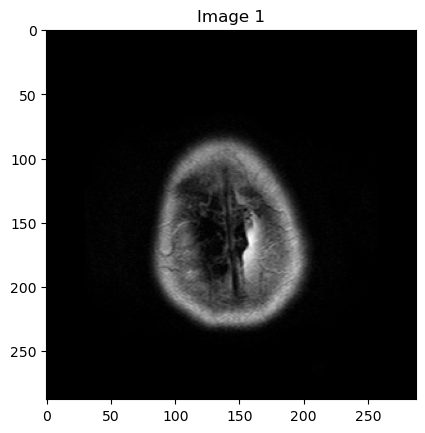

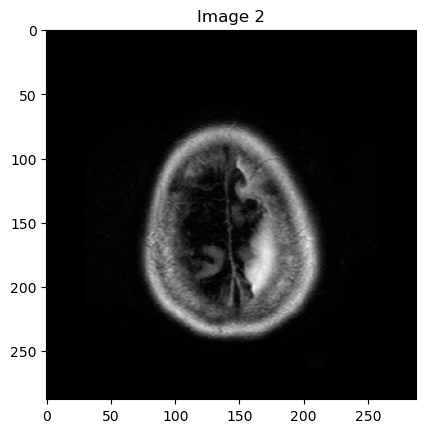

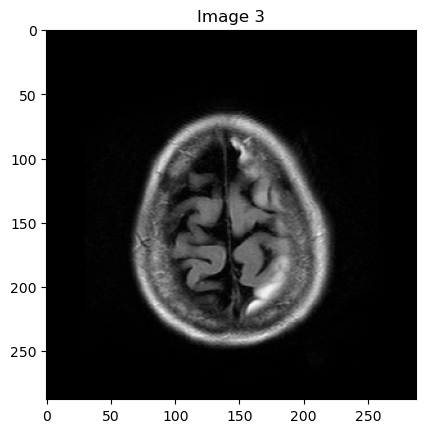

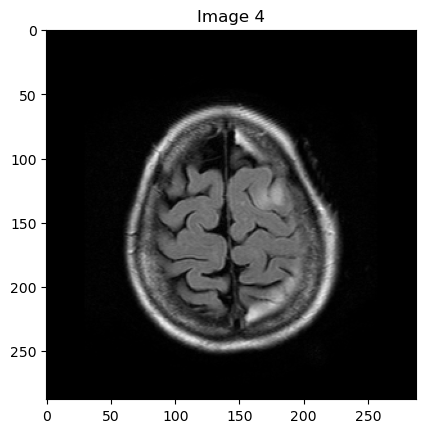

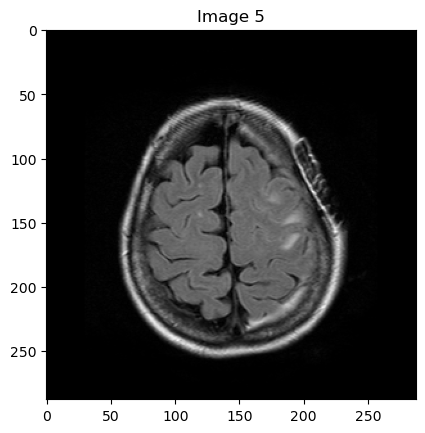

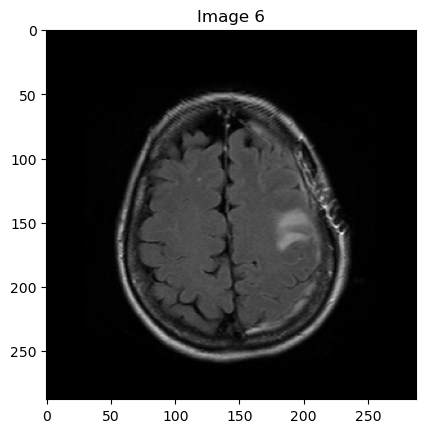

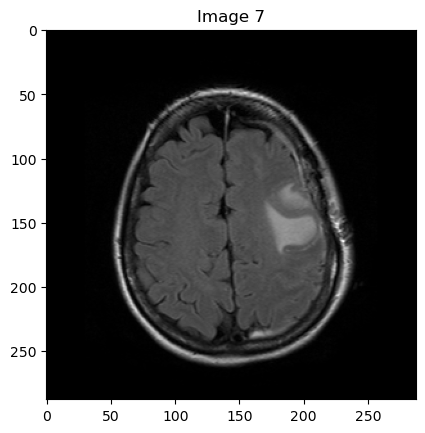

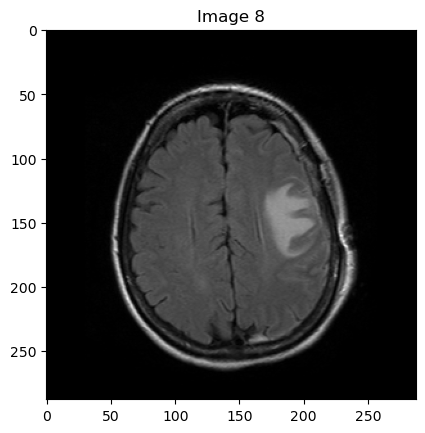

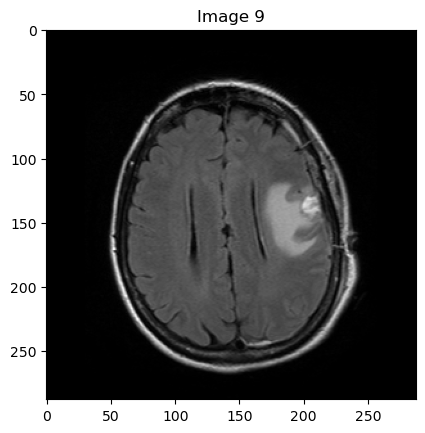

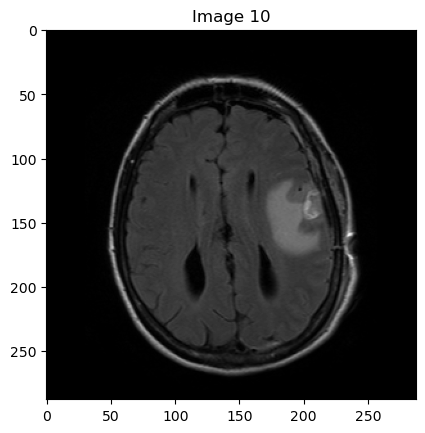

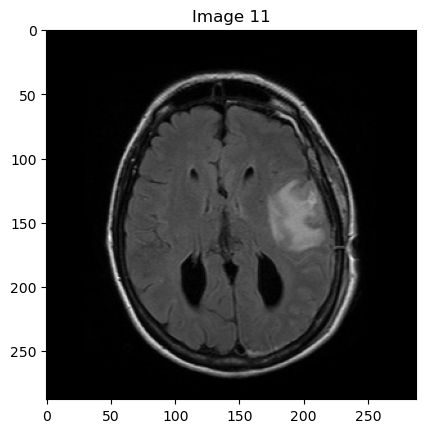

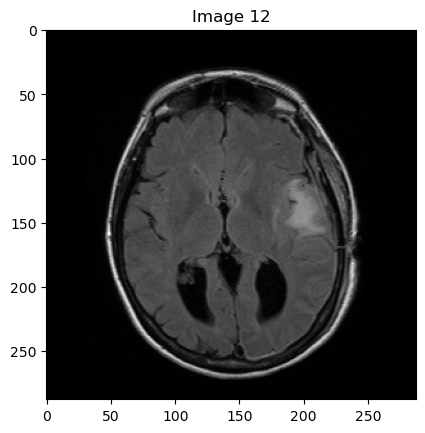

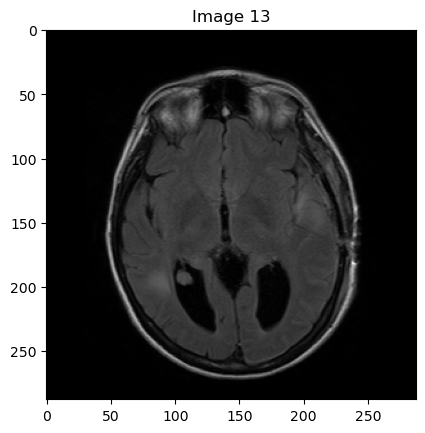

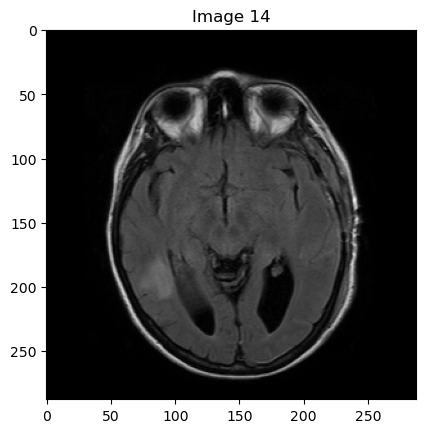

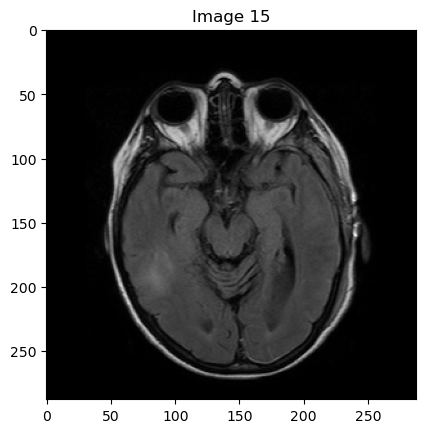

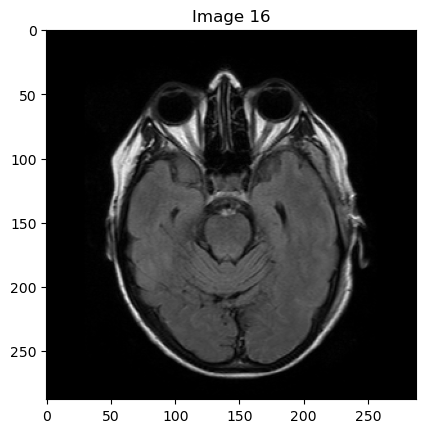

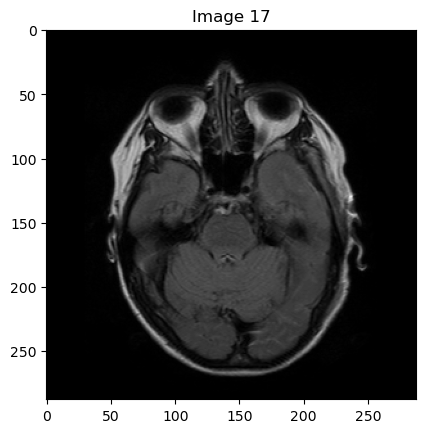

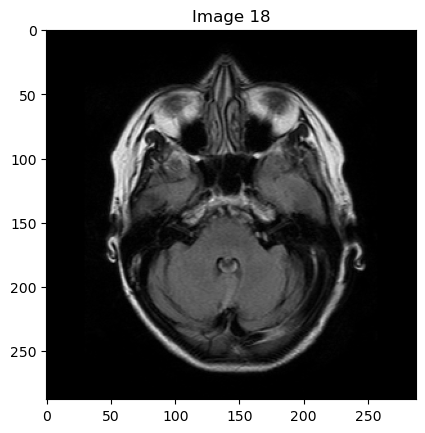

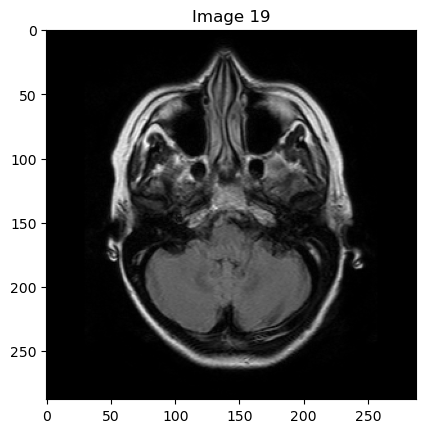

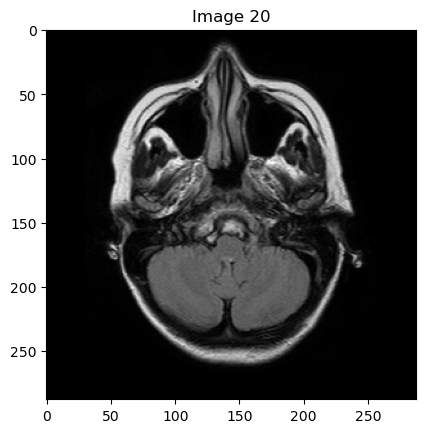

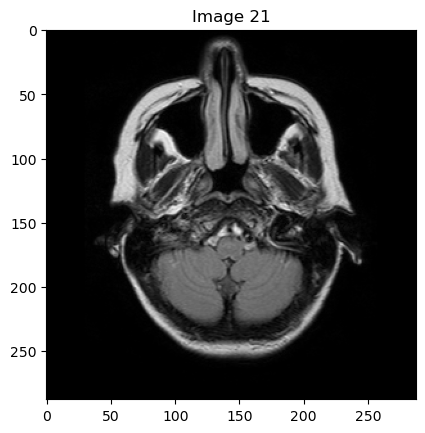

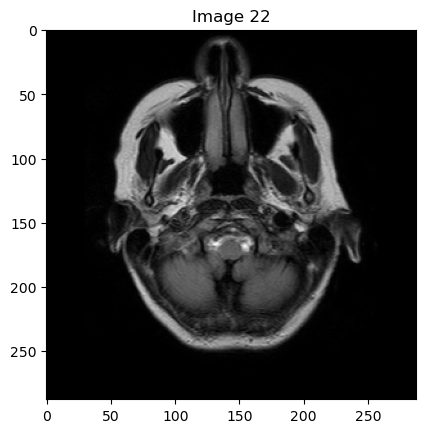

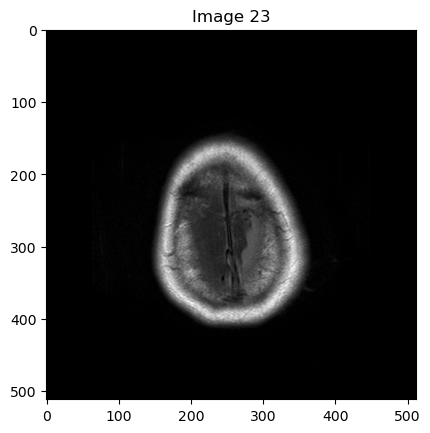

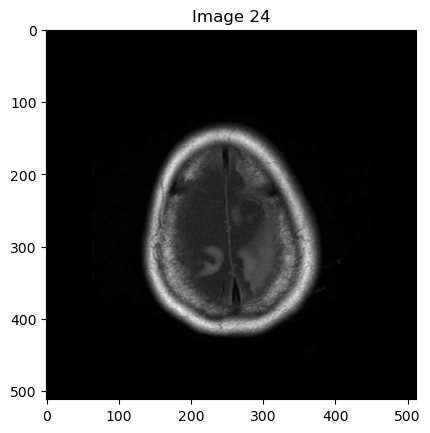

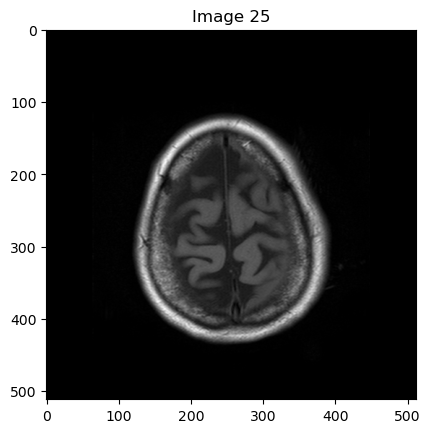

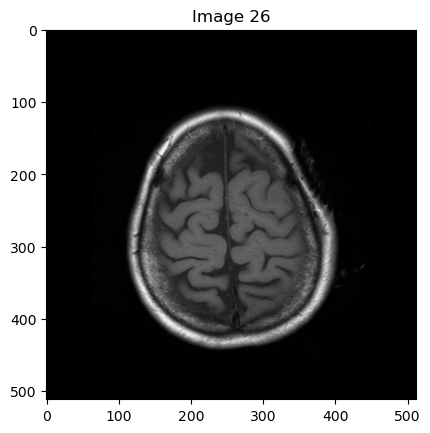

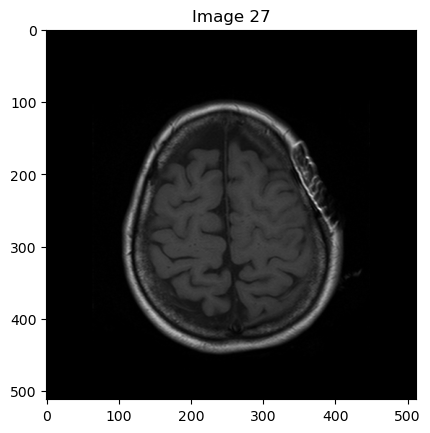

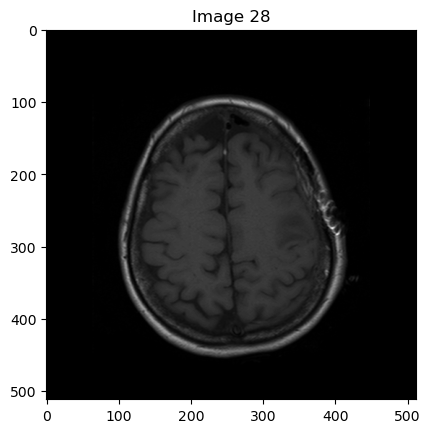

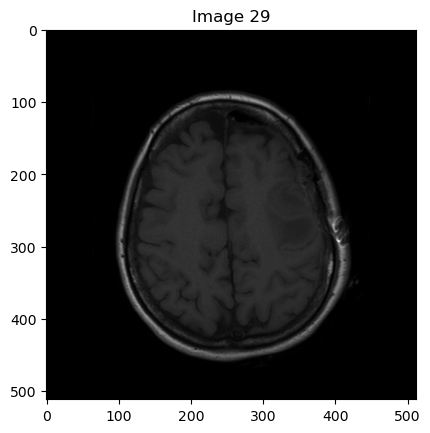

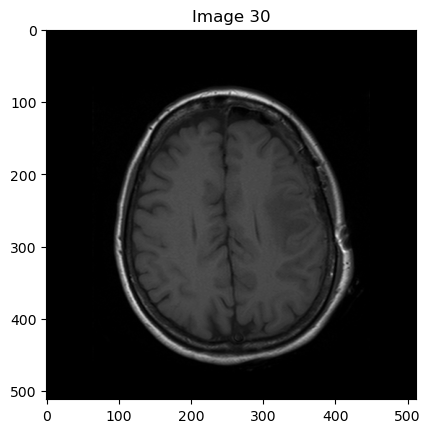

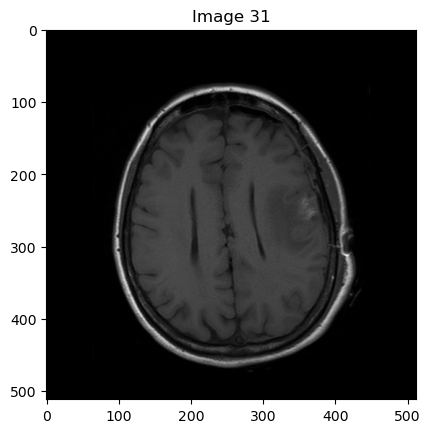

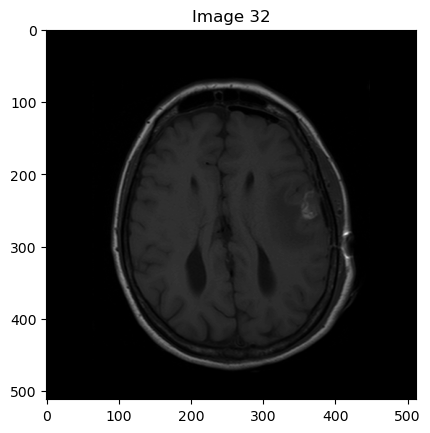

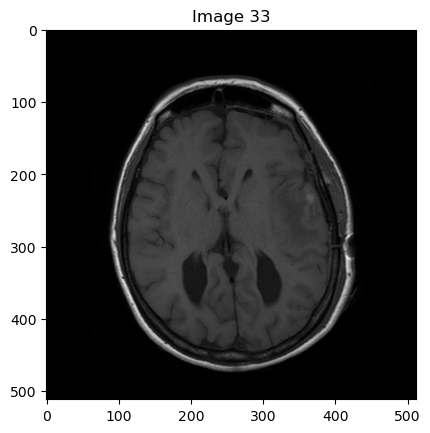

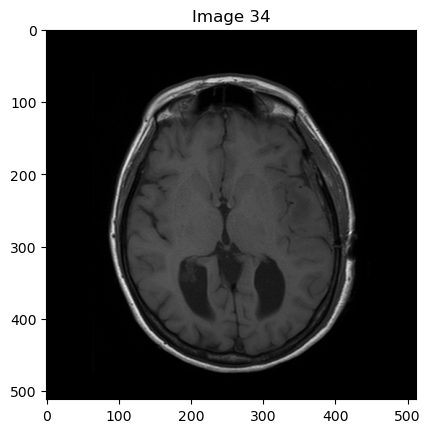

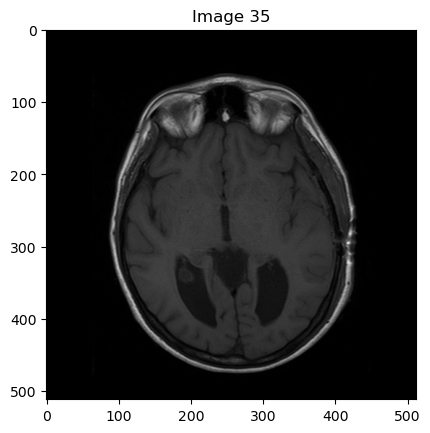

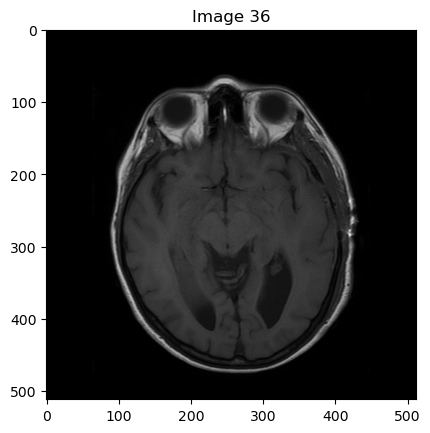

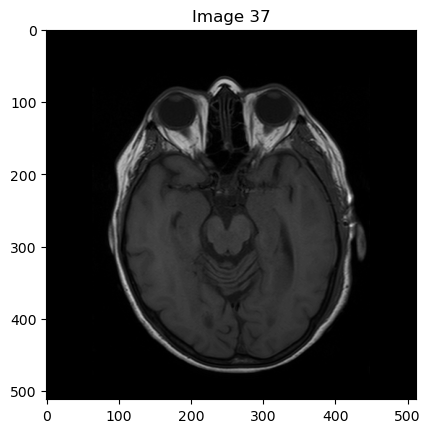

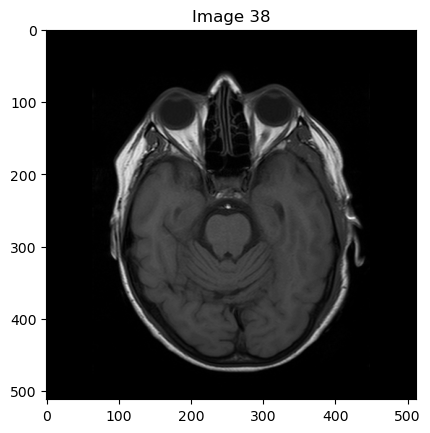

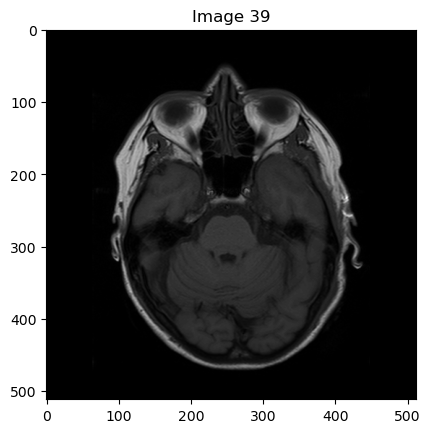

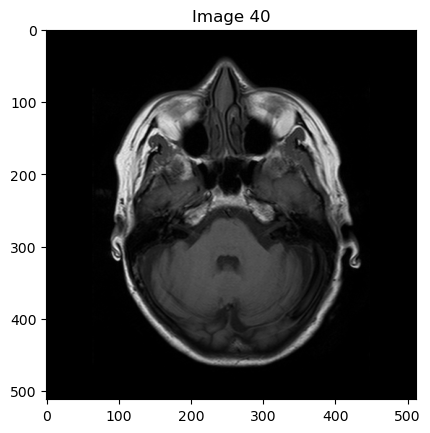

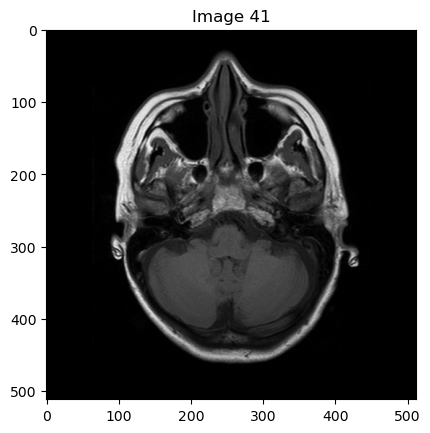

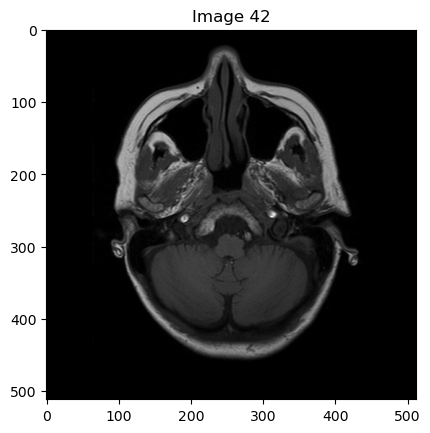

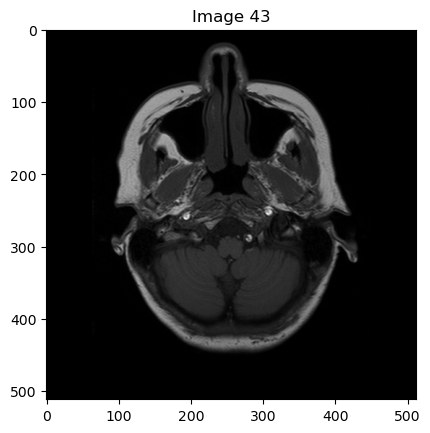

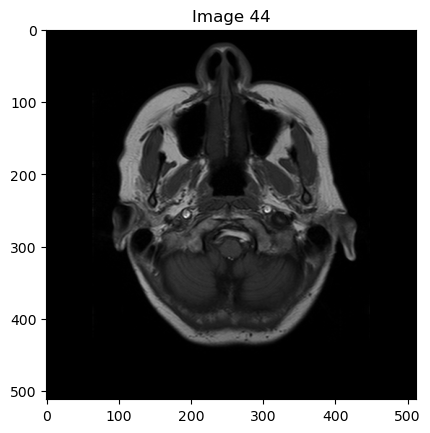

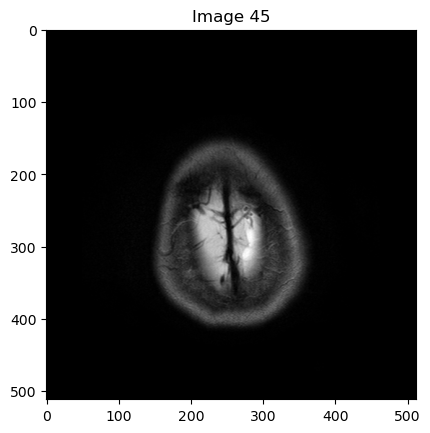

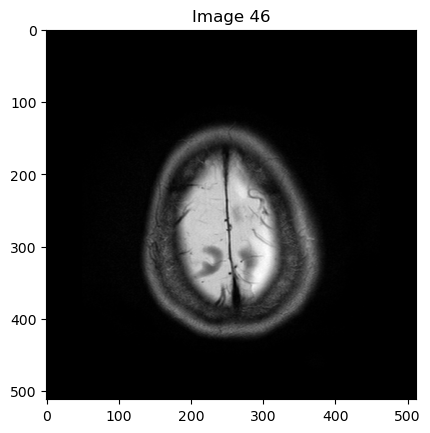

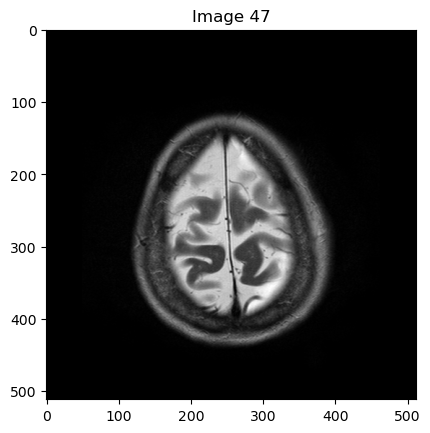

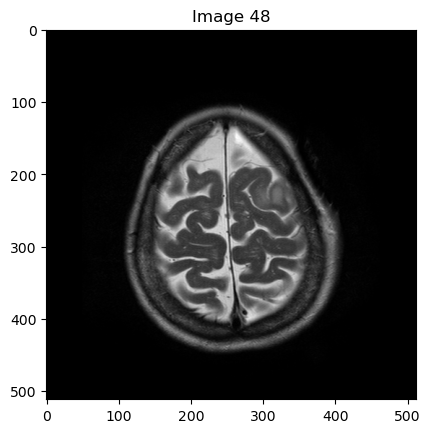

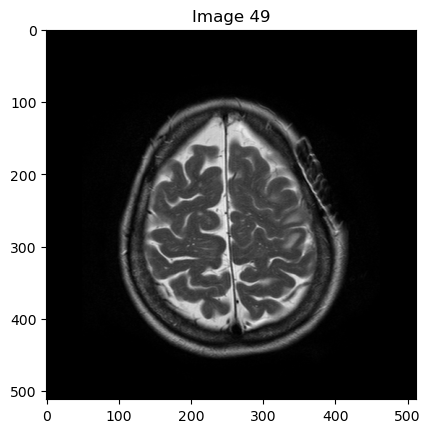

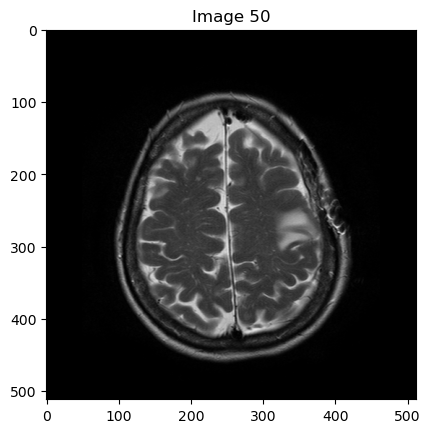

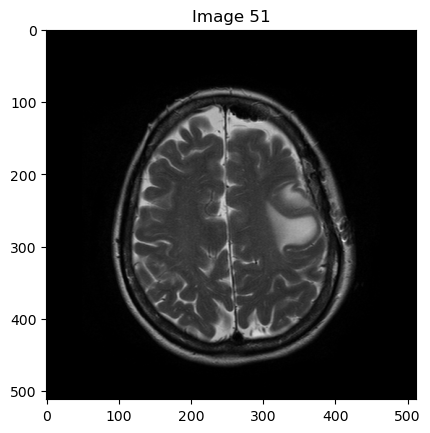

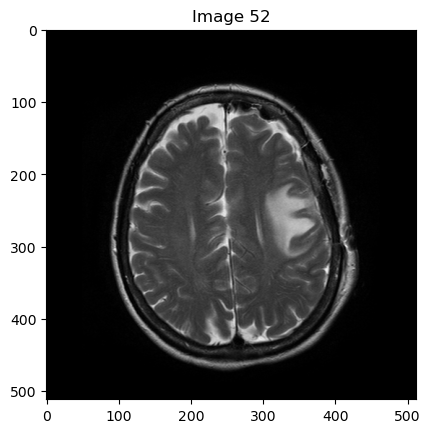

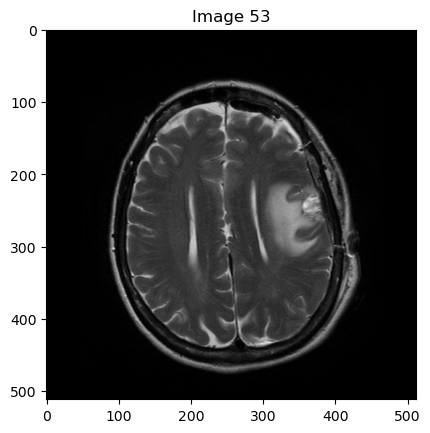

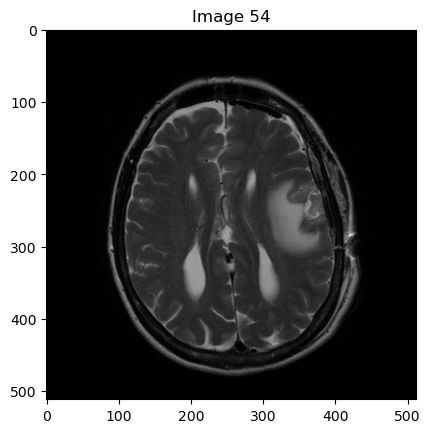

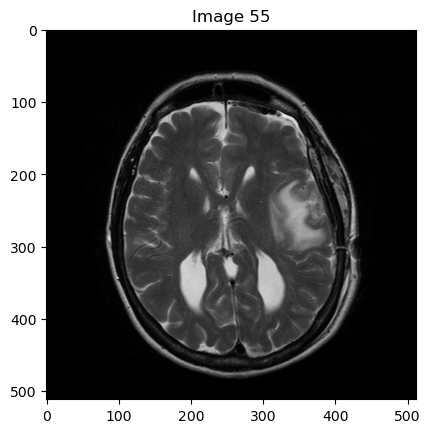

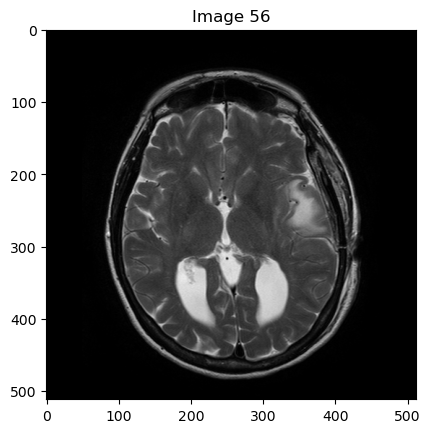

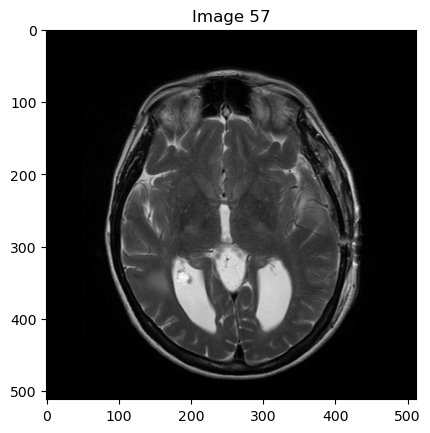

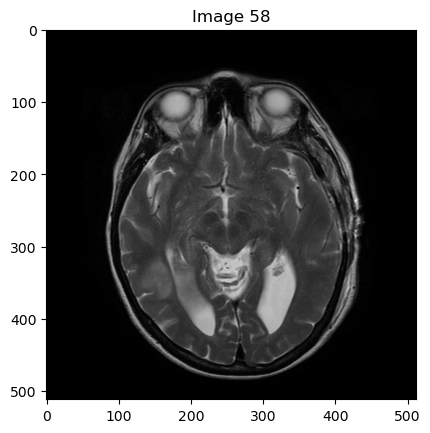

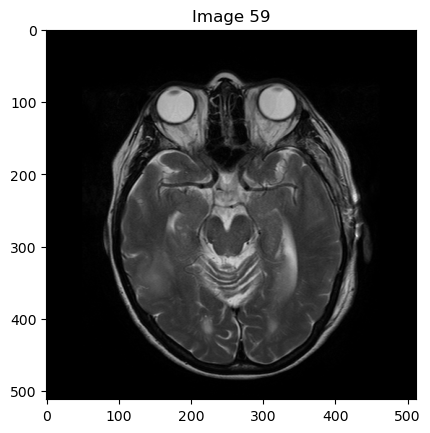

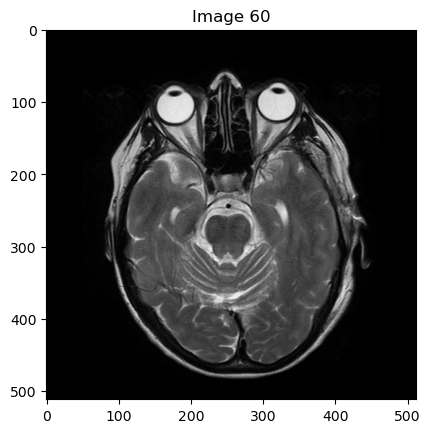

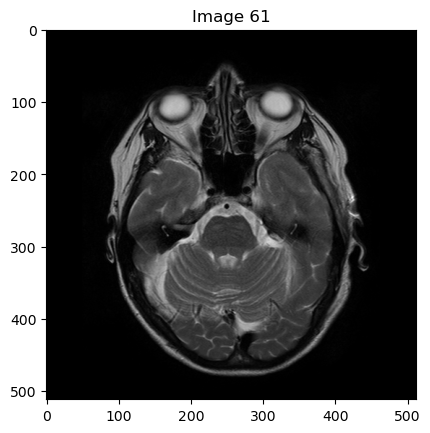

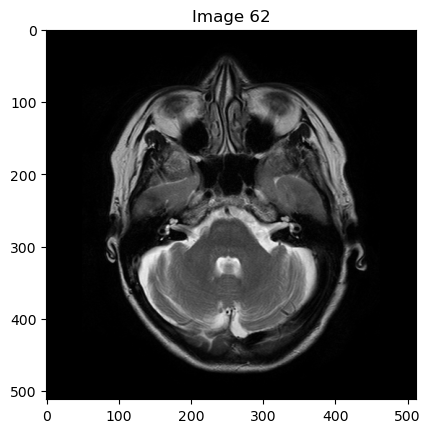

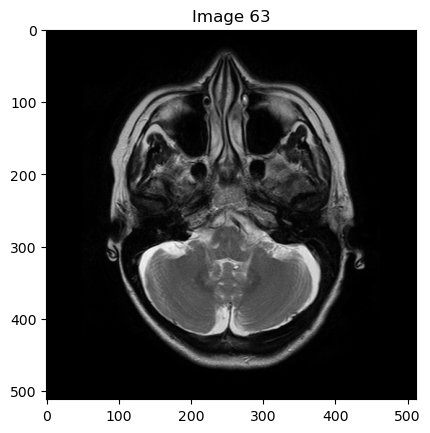

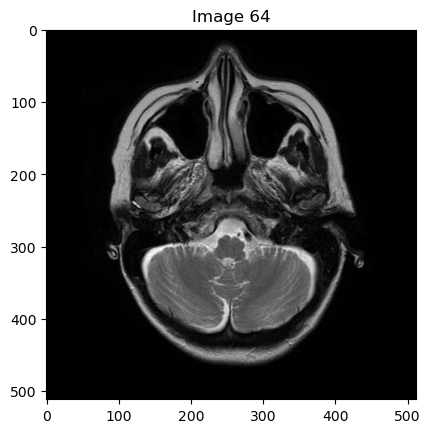

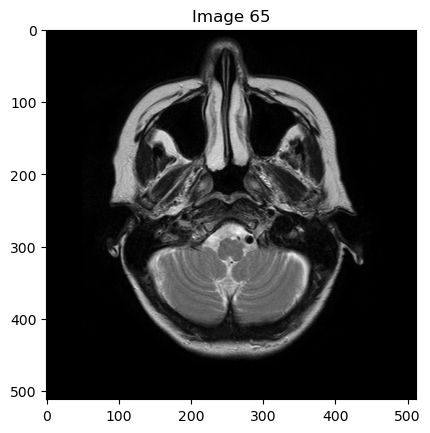

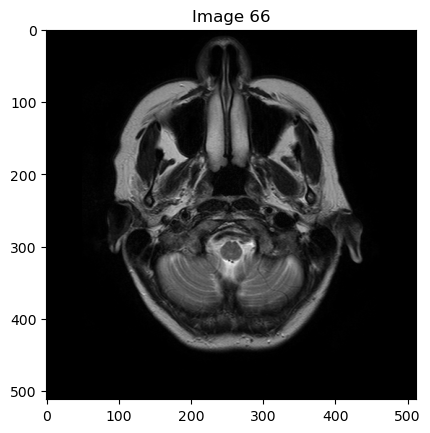

Total number of DICOM files: 66


In [13]:
import os
import pydicom
import matplotlib.pyplot as plt

def read_and_display_dicom_files(directory):
    # Initialize variables for file count
    file_count = 0

    # Iterate through DICOM files in the directory
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".dcm"):
                file_count += 1
                dcm_path = os.path.join(root, file)
                
                # Read DICOM file
                dcm_data = pydicom.dcmread(dcm_path)
                
                # Display DICOM image
                plt.imshow(dcm_data.pixel_array, cmap=plt.cm.gray)
                plt.title(f"Image {file_count}")
                plt.show()

    # Print total number of DICOM files
    print(f"Total number of DICOM files: {file_count}")

# Directory containing DICOM files
directory = r"D:/New folder/Neurohacking_data-0.0/Neurohacking_data-0.0/BRAINIX/DICOM/projecct"

# Read and display DICOM files
read_and_display_dicom_files(directory)


In [21]:
import pandas as pd

In [9]:
pip install psycopg2

   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.2 MB 435.7 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.2 MB 871.5 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.2 MB 1.1 MB/s eta 0:00:01
   ------- -------------------------------- 0.2/1.2 MB 1.1 MB/s eta 0:00:01
   --------- ------------------------------ 0.3/1.2 MB 1.2 MB/s eta 0:00:01
   ------------ --------------------------- 0.4/1.2 MB 1.2 MB/s eta 0:00:01
   --------------- ------------------------ 0.5/1.2 MB 1.3 MB/s eta 0:00:01
   ------------------ --------------------- 0.5/1.2 MB 1.4 MB/s eta 0:00:01
   -------------------- ------------------- 0.6/1.2 MB 1.4 MB/s eta 0:00:01
   --------------------- ------------------ 0.6/1.2 MB 1.4 MB/s eta 0:00:01
   --------------------------- ------------ 0.8/1.2 MB 1.5 MB/s eta 0:00:01
   -------------------

In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import pydicom
import pydicom.uid
from sklearn.model_selection import train_test_split
from PIL import Image
import psycopg2
from psycopg2 import Error

# Define global variables
IMAGE_WIDTH = 256
IMAGE_HEIGHT = 256
NUM_CLASSES = 3
BATCH_SIZE = 32
EPOCHS = 10

def build_model(input_shape):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(NUM_CLASSES, activation='softmax'))
    return model

def load_data(data_dir):
    images = []
    labels = []
    for label, sequence_type in enumerate(['T1', 'T2', 'FLAIR']):
        sequence_dir = os.path.join(data_dir, sequence_type)
        if os.path.isdir(sequence_dir):
            for file in os.listdir(sequence_dir):
                file_path = os.path.join(sequence_dir, file)
                try:
                    ds = pydicom.dcmread(file_path, force=True)
                    ds.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
                    image = ds.pixel_array
                    image = Image.fromarray(image)
                    image = image.resize((IMAGE_WIDTH, IMAGE_HEIGHT))
                    images.append(np.array(image))
                    labels.append(label)
                except Exception as e:
                    print(f"Error reading file {file_path}: {e}")
    return np.array(images), np.array(labels)

def store_to_postgres(images, labels):
    try:
        connection = psycopg2.connect(
            host="localhost",
            database="MRI class",
            user="postgres",
            password="########"
        )
        cursor = connection.cursor()

        cursor.execute("""
            CREATE TABLE IF NOT EXISTS T1 (
                id SERIAL PRIMARY KEY,
                image_data BYTEA
            );
        """)
        cursor.execute("""
            CREATE TABLE IF NOT EXISTS T2 (
                id SERIAL PRIMARY KEY,
                image_data BYTEA
            );
        """)
        cursor.execute("""
            CREATE TABLE IF NOT EXISTS FLAIR (
                id SERIAL PRIMARY KEY,
                image_data BYTEA
            );
        """)

        for image, label in zip(images, labels):
            table_name = ""
            if label == 0:
                table_name = "T1"
            elif label == 1:
                table_name = "T2"
            elif label == 2:
                table_name = "FLAIR"
            
            cursor.execute(f"INSERT INTO {table_name} (image_data) VALUES (%s)", (psycopg2.Binary(image.tobytes()),))

        connection.commit()
        print("Images stored successfully in PostgreSQL")

    except Error as e:
        print(f"Error while connecting to PostgreSQL: {e}")

    finally:
        if cursor:
            cursor.close()
        if connection:
            connection.close()

def main():
    data_dir = r"D:/New folder/Neurohacking_data-0.0/Neurohacking_data-0.0/BRAINIX/DICOM/projecct"
    X, y = load_data(data_dir)
    
    if len(X) == 0:
        print("No valid DICOM files found in the dataset directory.")
        return
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    
    X_train = X_train.astype('float32') / 255
    X_val = X_val.astype('float32') / 255
    
    input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 1)
    model = build_model(input_shape)
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_val, y_val))
    
    loss, accuracy = model.evaluate(X_val, y_val)
    print(f"Validation Loss: {loss}, Validation Accuracy: {accuracy}")
    
    store_to_postgres(X, y)

if __name__ == "__main__":
    main()


Error reading file D:/New folder/Neurohacking_data-0.0/Neurohacking_data-0.0/BRAINIX/DICOM/projecct\T1\.DS_Store: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Error reading file D:/New folder/Neurohacking_data-0.0/Neurohacking_data-0.0/BRAINIX/DICOM/projecct\T2\.DS_Store: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset
Epoch 1/10


C:\Users\ACER\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 804ms/step - accuracy: 0.4071 - loss: 1.2983 - val_accuracy: 0.2143 - val_loss: 3.5194
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step - accuracy: 0.3117 - loss: 2.3394 - val_accuracy: 0.2857 - val_loss: 1.2717
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step - accuracy: 0.3478 - loss: 1.1397 - val_accuracy: 0.2143 - val_loss: 1.0706
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step - accuracy: 0.5256 - loss: 0.9964 - val_accuracy: 0.4286 - val_loss: 1.0425
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step - accuracy: 0.7035 - loss: 0.8716 - val_accuracy: 0.5000 - val_loss: 1.1516
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step - accuracy: 0.7708 - loss: 0.6741 - val_accuracy: 0.2857 - val_loss: 1.2646
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step - accuracy: 0.6338 - loss: 0.6176 - val_accuracy: 0.6429 - val_loss: 1.0546
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 636ms/step - accuracy: 0.8117 - loss: 0.4518 - val_accuracy: 0.6429 - val_loss: 1.1612
Epo

In [3]:
import psycopg2
from psycopg2 import Error

def check_database():
    try:
        # Connect to the PostgreSQL database
        connection = psycopg2.connect(
            host="localhost",
            database="MRI class",
            user="postgres",
            password="#########"
        )

        cursor = connection.cursor()

        # Query to count records in each table
        queries = [
            "SELECT COUNT(*) FROM T1;",
            "SELECT COUNT(*) FROM T2;",
            "SELECT COUNT(*) FROM FLAIR;"
        ]

        for query in queries:
            cursor.execute(query)
            count = cursor.fetchone()[0]
            print(f"Count: {count}")

        print("Database check completed.")

    except Error as e:
        print(f"Error while connecting to PostgreSQL: {e}")

    finally:
        # Close the cursor and connection
        if cursor:
            cursor.close()
        if connection:
            connection.close()

# Call the function to check the database
check_database()


Count: 22
Count: 22
Count: 22
Database check completed.


In [7]:
import psycopg2
from PIL import Image
import io

try:
    # Connect to PostgreSQL database
    connection = psycopg2.connect(
        host="localhost",
        database="MRI class",
        user="postgres",
        password="########"
    )
    
    cursor = connection.cursor()
    
    # Fetch image data from T1 table
    cursor.execute("SELECT image_data FROM T1;")
    rows = cursor.fetchall()
    
    for i, row in enumerate(rows, 1):
        image_data = row[0]
        
        # Convert BYTEA data to bytes
        image_bytes = bytes(image_data)
        
        # Open image using PIL
        image = Image.open(io.BytesIO(image_bytes))
        
        # Show image
        image.show(title=f"T1 Image {i}")
    
except Exception as e:
    print(f"Error: {e}")

finally:
    if cursor:
        cursor.close()
    if connection:
        connection.close()


Error: cannot identify image file <_io.BytesIO object at 0x000001AE984E0590>


In [10]:
import psycopg2
from psycopg2 import Binary
from PIL import Image
import io

# Connect to PostgreSQL
try:
    connection = psycopg2.connect(
        host="localhost",
        database="MRI class",
        user="postgres",
        password="##########"
    )

    cursor = connection.cursor()

    # Fetch image_data from T1 table
    cursor.execute("SELECT image_data FROM T1 WHERE id = 1")  # Replace '1' with the actual ID you want to fetch
    record = cursor.fetchone()

    if record:
        image_binary = record[0]
        
        # Save binary data to a temporary file
        temp_file_path = "temp_image.jpg"  # You can change the extension based on the image format
        with open(temp_file_path, "wb") as f:
            f.write(image_binary)
        
        # Open and display the image
        image = Image.open(temp_file_path)
        image.show()
        
        # Clean up the temporary file
        os.remove(temp_file_path)
        
    else:
        print("No image found")

except Exception as e:
    print(f"Error: {e}")

finally:
    if cursor:
        cursor.close()
    if connection:
        connection.close()


Error: cannot identify image file 'temp_image.jpg'


In [13]:
import psycopg2
from psycopg2 import Error
from PIL import Image
import io

try:
    # Connect to PostgreSQL database
    connection = psycopg2.connect(
        host="localhost",
        database="MRI class",
        user="postgres",
        password="#########"
    )
    
    cursor = connection.cursor()
    
    # Fetch binary data from T1 table
    cursor.execute("SELECT image_data FROM T1 WHERE image_data IS NOT NULL;")
    records = cursor.fetchall()

    for i, record in enumerate(records):
        # Decode binary data to bytes
        image_bytes = record[0]
        
        try:
            # Create an image from bytes
            image = Image.open(io.BytesIO(image_bytes))
            
            # Save the image
            image.save(f"image_{i}.jpg")
            
        except Exception as e:
            print(f"Error processing image {i}: {e}")

    print("Images saved successfully")

except Error as e:
    print(f"Error while connecting to PostgreSQL: {e}")

finally:
    # Close the cursor and connection
    if cursor:
        cursor.close()
    if connection:
        connection.close()


Error processing image 0: cannot identify image file <_io.BytesIO object at 0x000001AF299BBE50>
Error processing image 1: cannot identify image file <_io.BytesIO object at 0x000001AF3BCFBD10>
Error processing image 2: cannot identify image file <_io.BytesIO object at 0x000001AF3BCFBD10>
Error processing image 3: cannot identify image file <_io.BytesIO object at 0x000001AF3BCFBD10>
Error processing image 4: cannot identify image file <_io.BytesIO object at 0x000001AF3BCFBD10>
Error processing image 5: cannot identify image file <_io.BytesIO object at 0x000001AF3BCFBD10>
Error processing image 6: cannot identify image file <_io.BytesIO object at 0x000001AF3BCFBD10>
Error processing image 7: cannot identify image file <_io.BytesIO object at 0x000001AF3BCFBD10>
Error processing image 8: cannot identify image file <_io.BytesIO object at 0x000001AF3BCFBD10>
Error processing image 9: cannot identify image file <_io.BytesIO object at 0x000001AF3BCFBD10>
Error processing image 10: cannot identi

In [16]:
import psycopg2
from psycopg2 import Error
from PIL import Image
import numpy as np

try:
    # Connect to PostgreSQL database
    connection = psycopg2.connect(
        host="localhost",
        database="MRI class",
        user="postgres",
        password="#########"
    )
    
    cursor = connection.cursor()
    
    # Fetch binary data from T1 table
    cursor.execute("SELECT image_data FROM T1 WHERE image_data IS NOT NULL;")
    records = cursor.fetchall()

    for i, record in enumerate(records):
        # Convert binary data from bytea to bytes
        image_bytes = bytes(record[0])
        
        try:
            # Convert bytes to numpy array
            image_array = np.frombuffer(image_bytes, dtype=np.uint8)
            
            # Create an image from numpy array
            image = Image.open(io.BytesIO(image_array))
            
            # Save the image
            image.save(f"image_{i}.jpg")
            
        except Exception as e:
            print(f"Error processing image {i}: {e}")

    print("Images saved successfully")

except Error as e:
    print(f"Error while connecting to PostgreSQL: {e}")

finally:
    # Close the cursor and connection
    if cursor:
        cursor.close()
    if connection:
        connection.close()


Error processing image 0: cannot identify image file <_io.BytesIO object at 0x000001AF3BD042C0>
Error processing image 1: cannot identify image file <_io.BytesIO object at 0x000001AF3BD042C0>
Error processing image 2: cannot identify image file <_io.BytesIO object at 0x000001AF3BD042C0>
Error processing image 3: cannot identify image file <_io.BytesIO object at 0x000001AF3BD042C0>
Error processing image 4: cannot identify image file <_io.BytesIO object at 0x000001AF3BD042C0>
Error processing image 5: cannot identify image file <_io.BytesIO object at 0x000001AF3BD042C0>
Error processing image 6: cannot identify image file <_io.BytesIO object at 0x000001AF3BD042C0>
Error processing image 7: cannot identify image file <_io.BytesIO object at 0x000001AF3BD042C0>
Error processing image 8: cannot identify image file <_io.BytesIO object at 0x000001AF3BD042C0>
Error processing image 9: cannot identify image file <_io.BytesIO object at 0x000001AF3BD042C0>
Error processing image 10: cannot identi